Questo link vale come oro per le `data.table`

https://stackoverflow.com/questions/1727772/quickly-reading-very-large-tables-as-dataframes-in-r/15058684#15058684

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/datatable_Cheat_Sheet_R.pdf

In [5]:
library(data.table)
library(ggplot2)

In [6]:
list.files(path="../../log")

[1] "clustering.csv"   "degree_distr.csv" "diameter.csv"     "memoryLog.csv"   
[5] "plot-0100.pdf"    "tutorial"

In [7]:
which(list.files(path="../../log") == "memoryLog.csv") ## check if file exist

[1] 4

In [8]:
system.time(DT <- fread("../../log/memoryLog.csv"))

   user  system elapsed 
   0.39    0.03    0.44 

In [9]:
names(DT) ## come csv normale

[1] "agent" "time"  "state" "news0" "news1" "news2"

In [15]:
subset(DT, time == 1) ## come csv normale legge tutte le colonne aventi time == 1

agent,time,state,news0,news1,news2
0,1,x,cfc8c2a25d5348a6,0,0
1,1,x,e26d1eaed7a51926,0,0
2,1,x,c4024b2c27086d24,0,0
3,1,x,a0192c1b9104647b,0,0
4,1,x,11f3b20def66f969,0,0
5,1,x,000040585040e4ca,0,0
6,1,d,0,0,0
7,1,d,0,0,0
8,1,d,0,0,0
9,1,d,0,0,0


In [49]:
newsvec <- DT[1:6,'news0']
newsvec <- as.vector(t(newsvec))
newsvec

[1] "cfc8c2a25d5348a6" "e26d1eaed7a51926" "c4024b2c27086d24" "a0192c1b9104647b"
[5] "11f3b20def66f969" "000040585040e4ca"

In [47]:
newsvec[1]

<0 x 0 matrix>

In [33]:
subset(DT, time == 101)

agent,time,state,news0,news1,news2
0,101,x,cfc8c2a25d5348a6,0,0
1,101,x,e26d1eaed7a51926,0,0
2,101,x,c4024b2c27086d24,0,0
3,101,x,a0192c1b9104647b,0,0
4,101,x,11f3b20def66f969,0,0
5,101,x,000040585040e4ca,0,0
6,101,d,000040585040e4ca,a0192c1b9104647b,e26d1eaed7a51926
7,101,d,cfc8c2a25d5348a6,e26d1eaed7a51926,000040585040e4ca
8,101,u,e26d1eaed7a51926,000040585040e4ca,11f3b20def66f969
9,101,u,e26d1eaed7a51926,a0192c1b9104647b,000040585040e4ca


In [55]:
sum(apply(subset(DT, time == 101),1,function(x) length(which(x==newsvec[0]))))

[1] 0

In [12]:
maxtime = DT[][which.max(time)]$time

In [57]:
TB <- data.table(n1=integer(),n2=integer(), n3=integer(),n4=integer(),n5=integer(),n6=integer())
for (i in 1:maxtime) {
    nn1 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[1]))))
    nn2 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[2]))))
    nn3 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[3]))))
    nn4 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[4]))))
    nn5 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[5]))))
    nn6 =sum(apply(subset(DT, time == i),1,function(x) length(which(x==newsvec[6]))))
   
    TB <- rbindlist(list(TB,  data.table(n1=nn1,n2=nn2,n3=nn3,n4=nn4,n5=nn5,n6=nn6)))
}
TB

n1,n2,n3,n4,n5,n6
1,1,1,1,1,1
5,8,5,3,9,11
6,8,6,3,10,15
30,39,29,27,47,56
62,124,52,84,109,109
77,208,54,158,191,129
77,229,54,189,205,134
79,243,54,201,205,132
78,249,53,208,214,132
78,263,50,224,225,136


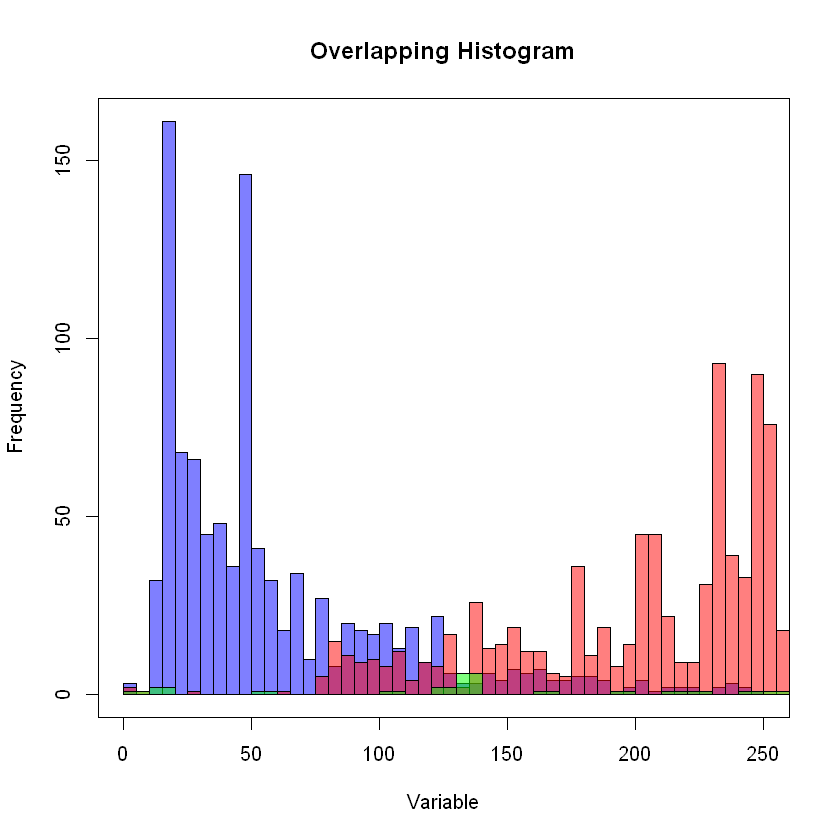

In [61]:
# Histogram Colored (blue and red)
hist(TB$n4, col=rgb(0,0,1,0.5),main="Overlapping Histogram", xlab="Variable", breaks=50)
hist(TB$n1, col=rgb(1,0,0,0.5), add=T, breaks=50)
hist(TB$n6, col=rgb(0,1,0,0.5), add=T, breaks=50)
box()
#vita media circa 50/100

In [86]:
up <- data.frame(length = TB$u)
do <- data.frame(length = TB$d)

up$num <- 'Up Ag.'
do$num <- 'Down Ag.'

gLengths <- rbind(up, do)

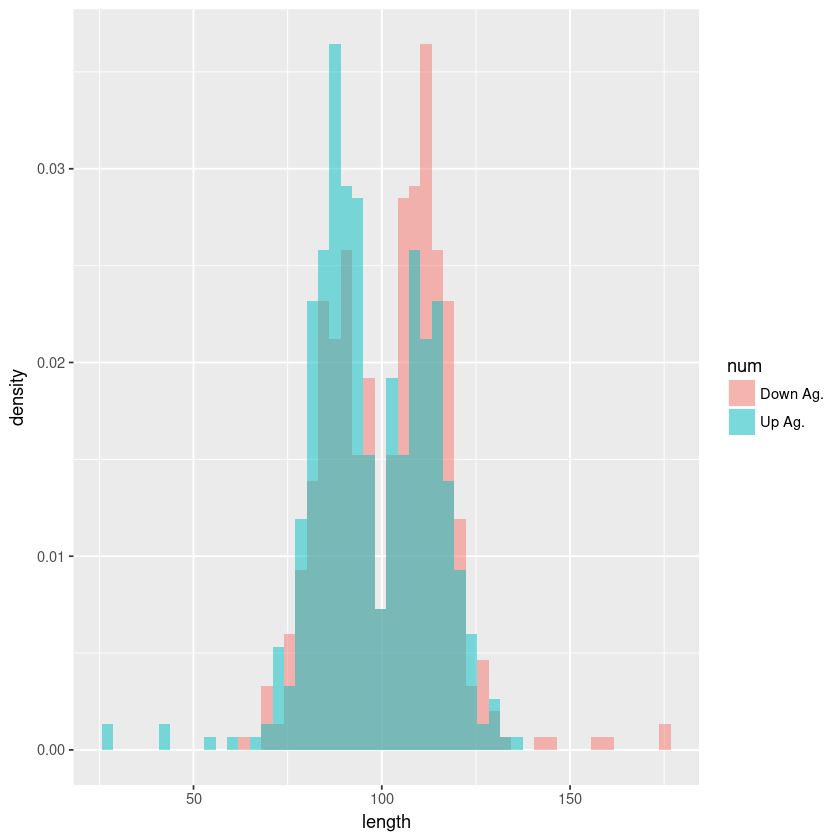

In [89]:
ggplot(gLengths, aes(length, fill = num)) + geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity', bins=50)

In [73]:
upag <- data.frame(length = v, weight = TB$u)
doag <- data.frame(length = v, weight = TB$d)

#Now, combine your two dataframes into one.  First make a new column in each that will be a variable to identify where they came from later.
upag$num <- 'Up Ag.'
doag$num <- 'Down Ag.'

#and combine into your new data frame vegLengths
agLengths <- rbind(upag, doag)

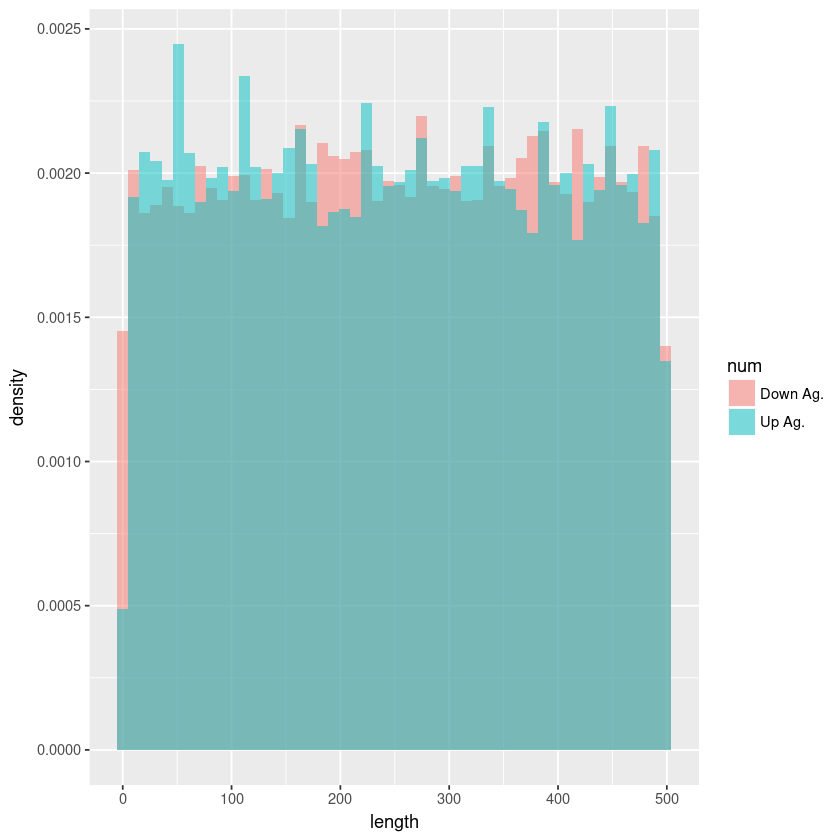

In [74]:
ggplot(agLengths, aes(length, weight = weight, fill = num)) + geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity', bins=50)